![image](https://www.livetradingnews.com/wp-content/uploads/2017/01/home-sales-701x526.jpg)
<div style="text-align: center" >Machine Learning Workflow of House Prices </div>

<div style="text-align: center"> Being a part of Kaggle gives us unlimited access to learn, share and grow as a Data Scientist. In this kernel, we want to solve <font color="red"><b>House Sales Prices with Advanced Regression Analysis</b></font>. We're going to share how we work with a dataset step by step  <b>from data preparation and data analysis to statistical tests and implementing machine learning models.</b> We'll also describe the model results along with many other tips. Let's get started.</div>

<div style="text-align:center"> If there are any recommendations/changes you would like to see in this notebook, please <b>leave a comment</b>. Any feedback/constructive criticism would be genuinely appreciated. 
 

# Goals
This kernel hopes to accomplish a few goals;
* Do a comprehensive data analysis along with visualizations. 
* Create models that are well equipped to predict better sale price of the houses. 

# Introduction
This kernel goes on a detailed analysis journey of most of the regression algorithms.  In addition to that, this kernel uses many charts and images to make things easier for readers to understand.
# Importing Necessary Libraries and datasets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

/kaggle/input/group-assignment-ace-2020/train.csv
/kaggle/input/group-assignment-ace-2020/data_description.txt
/kaggle/input/group-assignment-ace-2020/test.csv
/kaggle/input/group-assignment-ace-2020/sample_submission.csv


In [2]:
# Read in both the Train and Test datasets
train = pd.read_csv('/kaggle/input/group-assignment-ace-2020/train.csv')
test = pd.read_csv('/kaggle/input/group-assignment-ace-2020/test.csv')

# A Glimpse of the datasets.
> **Sample Train Dataset**

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


> ** Sample Test Dataset**

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Taking Description of the Datasets

In [5]:
print("Train set size:", train.shape)
print("Test set size:", test.shape)

Train set size: (1460, 81)
Test set size: (1459, 80)


In [6]:
# Let's see statistical information about the numerical variables. 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
# Let's see information about the features. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
# What's the count of different types of objects.

train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

## Checking for Missing Values

### Missing Train values

In [9]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


### Missing Test values

In [10]:
missing_percentage(test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


# Observation
* There are multiple types of features. 
* Some features have missing values. 
* Most of the features are object( includes string values in the variable).

Let's focus on the target variable which is **SalePrice.** Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression.

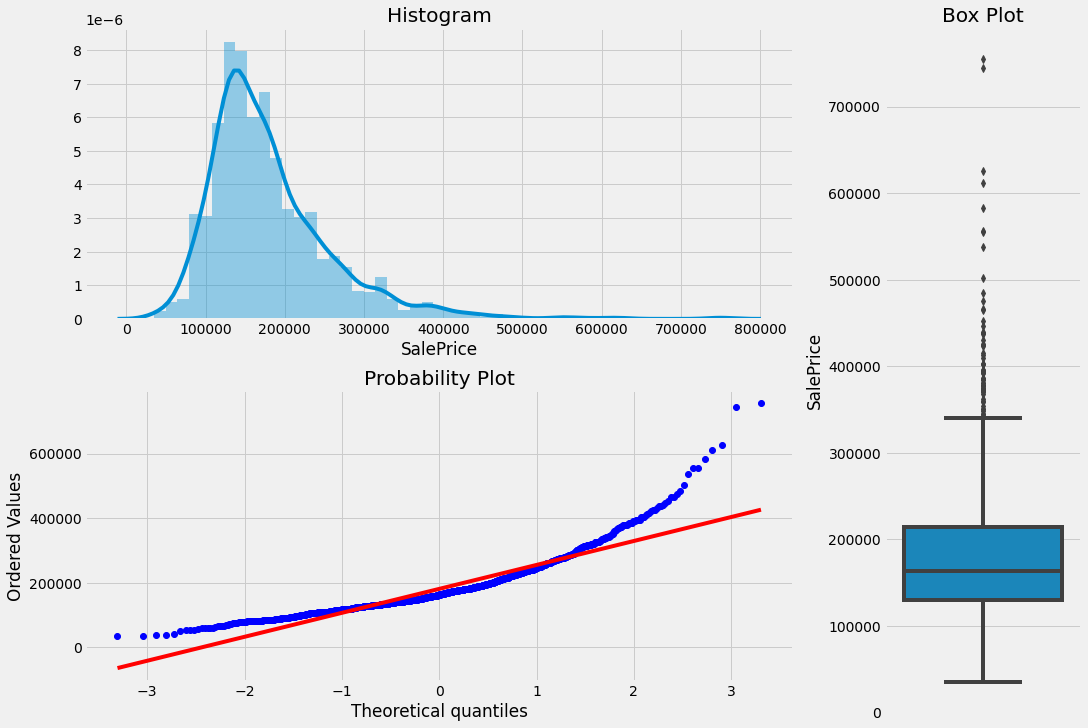

In [11]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'SalePrice')

These **three** charts above can tell us a lot about our target variable.
* Our target variable, **SalePrice** is not normally distributed.
* Our target variable is right-skewed. 
* There are multiple outliers in the variable. 


Let's find out how the sales price is distributed.

In [12]:
#skewness and kurtosis
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


It looks like there are quite a bit Skewness and Kurtosis in the target variable. Let's talk about those a bit. 

<b>Skewness</b> 
* is the degree of distortion from the symmetrical bell curve or the normal curve. 
* So, a symmetrical distribution will have a skewness of "0". 
* There are two types of Skewness: <b>Positive and Negative.</b> 
* <b>Positive Skewness</b>(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter. 
* In <b>positive Skewness </b> the mean and median will be greater than the mode. This is similar to this dataset. So, in Layman's terms, more houses were sold by less than the average price. 
* <b>Negative Skewness</b> means the tail on the left side of the distribution is longer and fatter.
* In <b>negative Skewness </b> the mean and median will be less than the mode. 
* Skewness differentiates extreme values in one versus the other tail. 

Here is a picture to make more sense.  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)


<b>Kurtosis</b>
According to Wikipedia, 

*In probability theory and statistics, **Kurtosis** is the measure of the "tailedness" of the probability. distribution of a real-valued random variable.* So, In other words it is the measure of the extreme values(outliers) present in the distribution. 

* There are three types of Kurtosis: <b>Mesokurtic, Leptokurtic and Platykurtic</b>. 
* Mesokurtic is similar to normal curve with the standard value of 3. This means that the extreme values of this distrubution is similar to that of a normal distribution. 
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
* Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions. 

![image](https://i2.wp.com/mvpprograms.com/help/images/KurtosisPict.jpg?resize=375%2C234)


You can read more about this from [this](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) article. 

We can fix this by using different types of transformation,  However, before doing that, let's find out the relationships among the target variable and other predictor variables. 

In [13]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

These are the predictor variables sorted in a descending order starting with the most correlated one **OverallQual**. Let's put this one in a scatter plot and see how it looks.

### SalePrice vs OverallQual

In [14]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (15,10))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);
    

In [15]:
train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

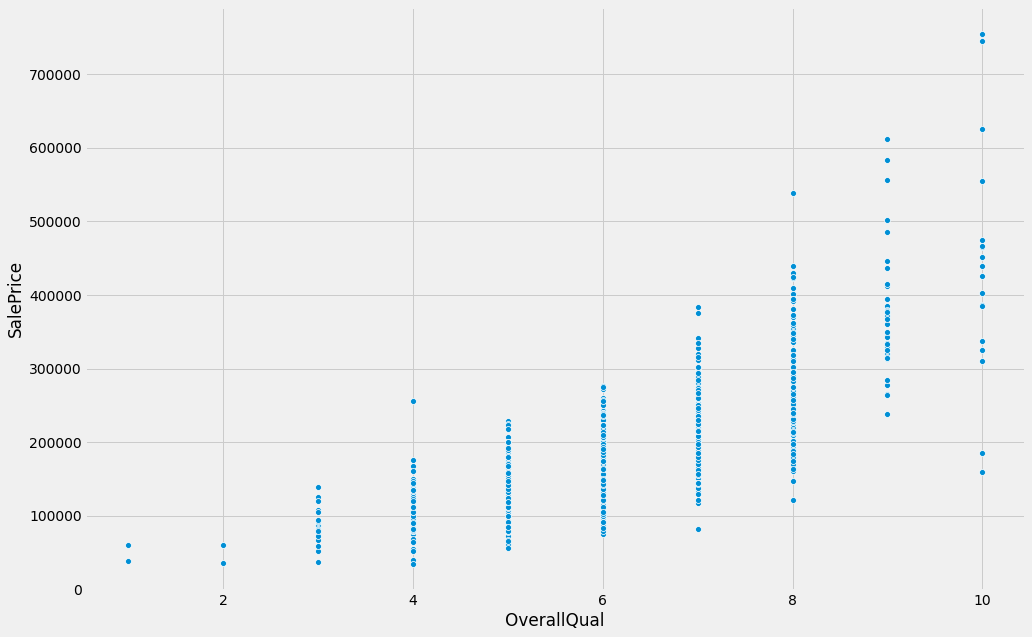

In [16]:
customized_scatterplot(train.SalePrice, train.OverallQual)

Clearly, **OverallQual** is a categorical variable and scatter plot is not the best way to visualize categorical variables. However, it looks like some of the houses are overpriced compared to their overall quality. These could be outliers. Let's check out some more features to determine the outliers. Let's focus on the numerical variables this time.

### SalePrice vs GrLivArea

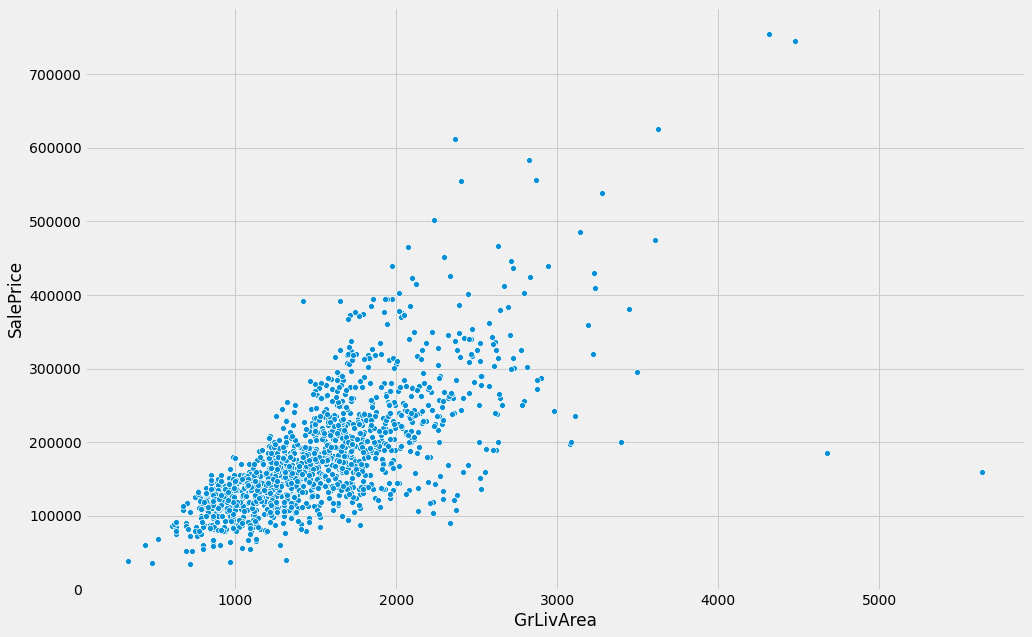

In [17]:
customized_scatterplot(train.SalePrice, train.GrLivArea)

As you can see there are two outliers in the plot above. We will get rid off them later. Let's look at another scatter plot with a different feature.

### SalePrice vs GarageArea

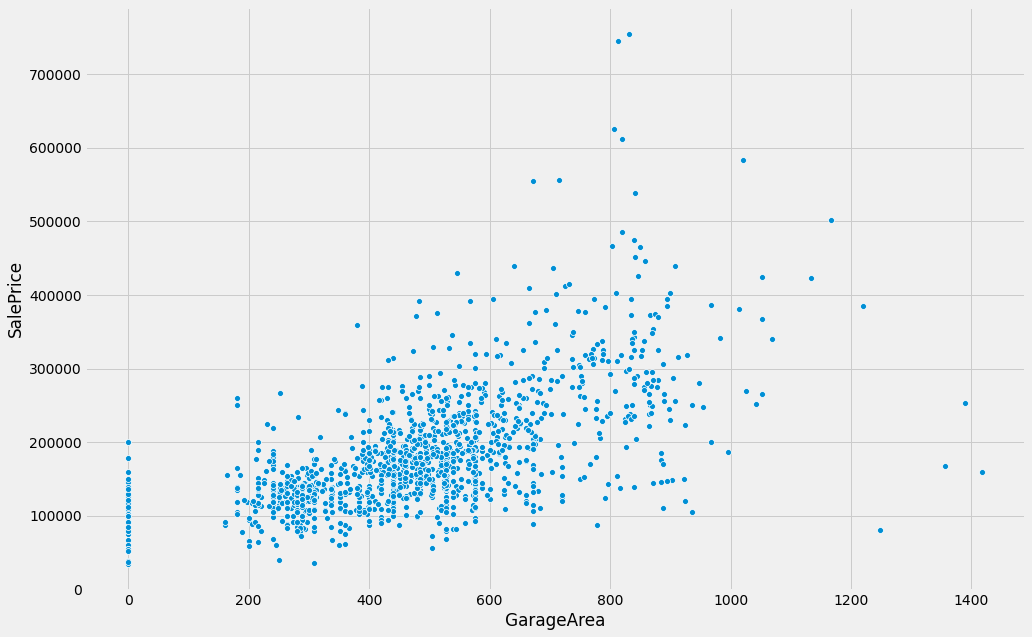

In [18]:
customized_scatterplot(train.SalePrice, train.GarageArea);

And the next one..?
### SalePrice vs TotalBsmtSF

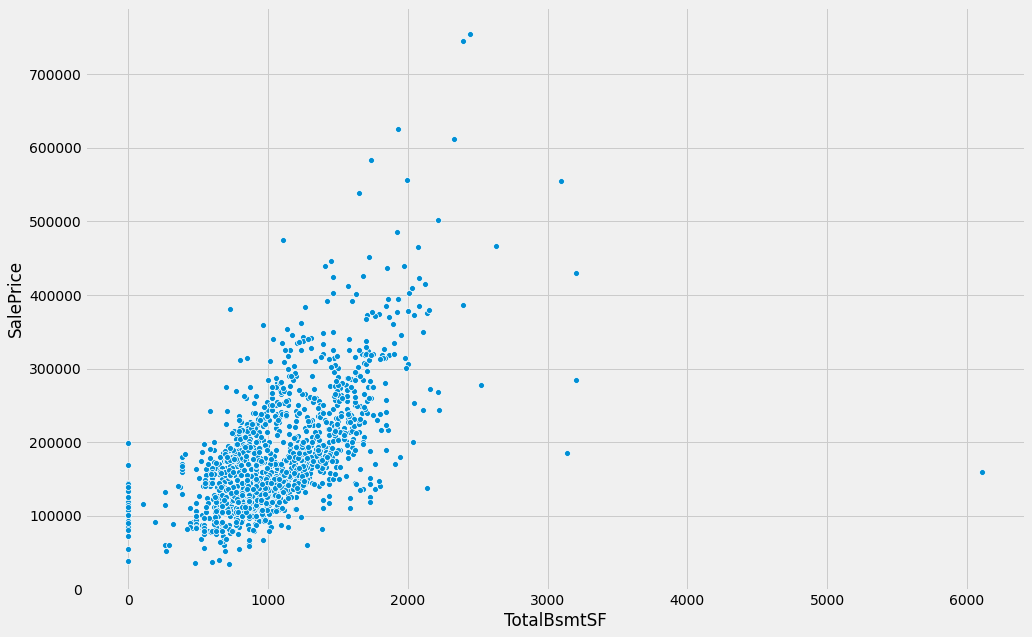

In [19]:
customized_scatterplot(train.SalePrice, train.TotalBsmtSF)

and the next ?
### SalePrice vs 1stFlrSF

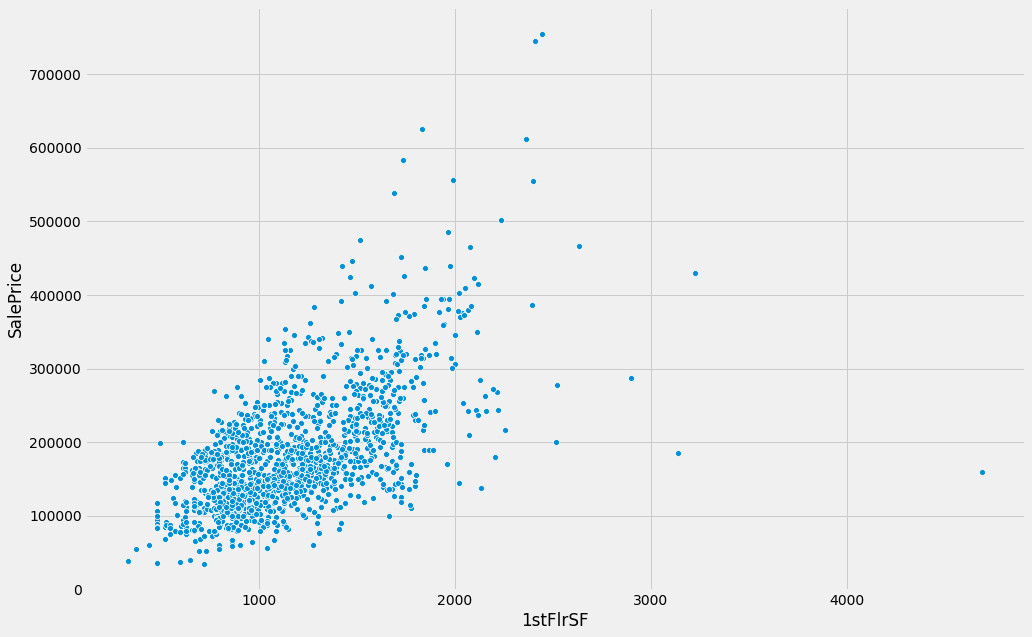

In [20]:
customized_scatterplot(train.SalePrice, train['1stFlrSF']);

How about one more...

### SalePrice vs MasVnrArea

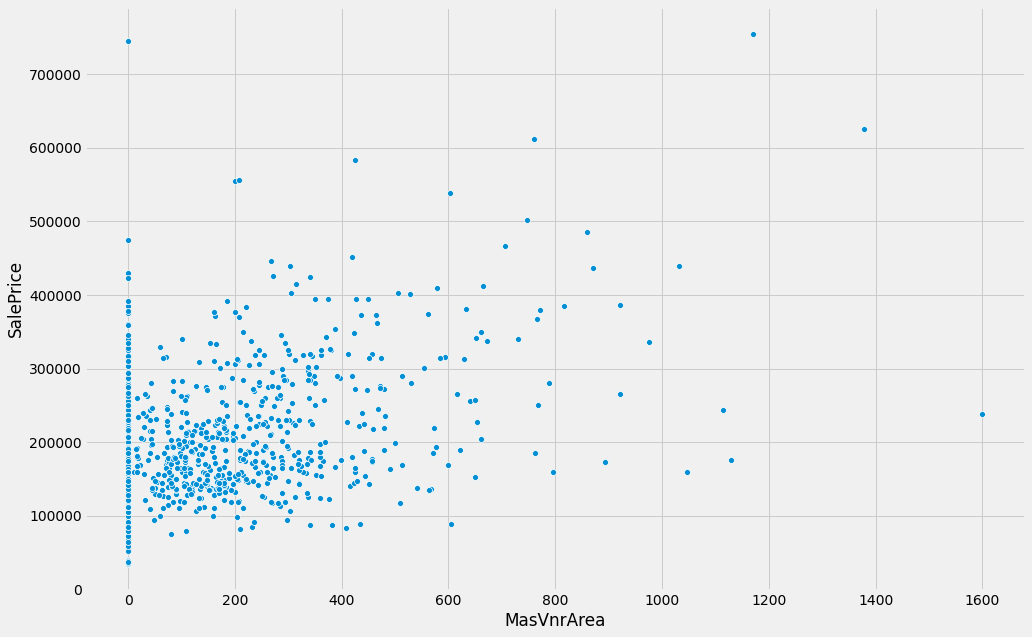

In [21]:
customized_scatterplot(train.SalePrice, train.MasVnrArea);

Okay, I think we have seen enough. Let's discuss what we have found so far. 

# Observations
* Our target variable shows an unequal level of variance across most predictor(independent) variable values. This is called **Heteroscedasticity(more explanation below)**; and is a red flag for the multiple linear regression model.
* There are many outliers in the scatter plots above that took our attention. 

* The two next to the top right edge of **SalePrice vs. GrLivArea** seems to follow a trend, which can be explained by saying that "As the prices increased so did the area. 
* However, The two on the bottom right of the same chart do not follow any trends. We will get rid of these two below.

In [22]:
## Deleting those two values with outliers. 
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = train.copy()

As we look through these scatter plots, We realized that it is time to explain the assumptions of Multiple Linear Regression. Before building a multiple linear regression model, we need to check that these assumptions below are valid.
## Assumptions of Regression

* **Linearity ( Correct functional form )** 
* **Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ). **
* **Independence of Errors ( vs Autocorrelation ) **
* **Multivariate Normality ( Normality of Errors ) **
* **No or little Multicollinearity. ** 

Since we fit a linear model, we assume that the relationship is **linear** and the errors, or residuals, are pure random fluctuations around the true line. We assume that the variability in the dependent variable doesn't increase as the value of the predictor(independent) increases, which is the assumption of equal variance, also known as **Homoscedasticity**. We also assume that the observations are independent of one another(**No Multicollinearity**) and a correlation between sequential observations or auto-correlation are not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with one of the different assumptions. Similarly, we can find and fix various assumptions with a few unique techniques.

So, **How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line.** Let's apply this for each one of them.

**Linearity ( Correct functional form )** 
Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present. 

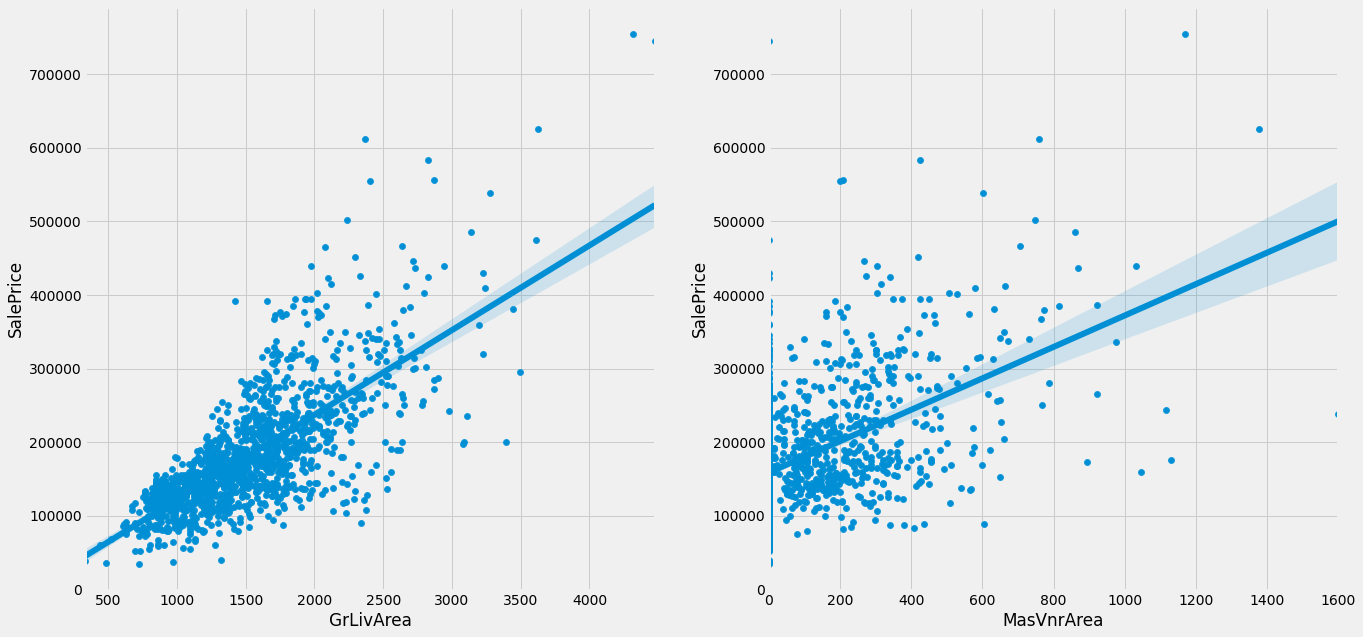

In [23]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2);

Here we are plotting our target variable with two independent variables **GrLivArea** and **MasVnrArea**. It's pretty apparent from the chart that there is a better linear relationship between **SalePrice** and **GrLivArea** than **SalePrice** and **MasVnrArea**. One thing to take note here, there are some outliers in the dataset. It is imperative to check for outliers since linear regression is sensitive to outlier effects. Sometimes we may be trying to fit a linear regression model when the data might not be so linear, or the function may need another degree of freedom to fit the data. In that case, we may need to change our function depending on the data to get the best possible fit. In addition to that, we can also check the residual plot, which tells us how is the error variance across the true line. Let's look at the residual plot for independent variable **GrLivArea** and our target variable **SalePrice **.

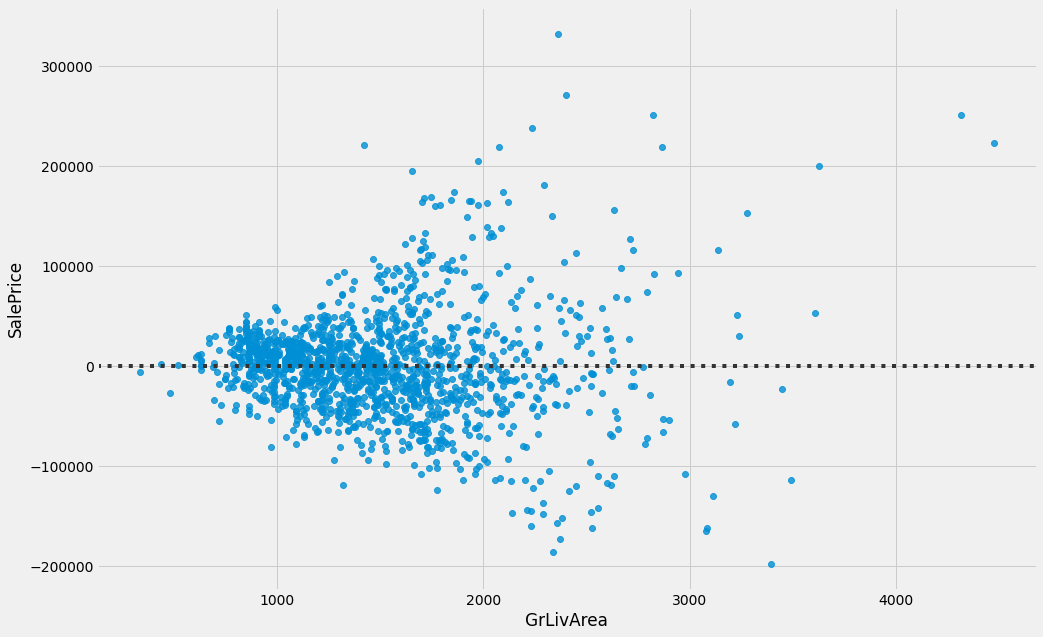

In [24]:
plt.subplots(figsize = (15,10))
sns.residplot(train.GrLivArea, train.SalePrice);

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel. The error plot shows that as **GrLivArea** value increases the variance also increases, which is the characteristics known as **Heteroscedasticity**; another assumption of linear regression. Let's break this down. 

**Homoscedasticity ( Constant Variance ):** 
The assumption of Homoscedasticity is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable like the residual plot above, we call that **Heteroscedasticity**. As you can tell, it is the opposite of **Homoscedasticity.**

<p><img src="https://www.dummies.com/wp-content/uploads/415147.image1.jpg" style="float:center"></img></p>

This plot above is an excellent example of Homoscedasticity. As you can see, the residual variance is the same as the value of the predictor variable increases. One way to fix this Heteroscedasticity is by using a transformation method like log-transformation or box-cox transformation. We will do that later.

**Multivariate Normality ( Normality of Errors):**
The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram or a Q-Q-Plot can check whether the target variable is normally distributed or not. The goodness of fit test, e.g., the Kolmogorov-Smirnov test or can check for normality in the dependent variable. We already know that our target variable does not follow a normal distribution. Let's bring back the three charts to show our target variable.

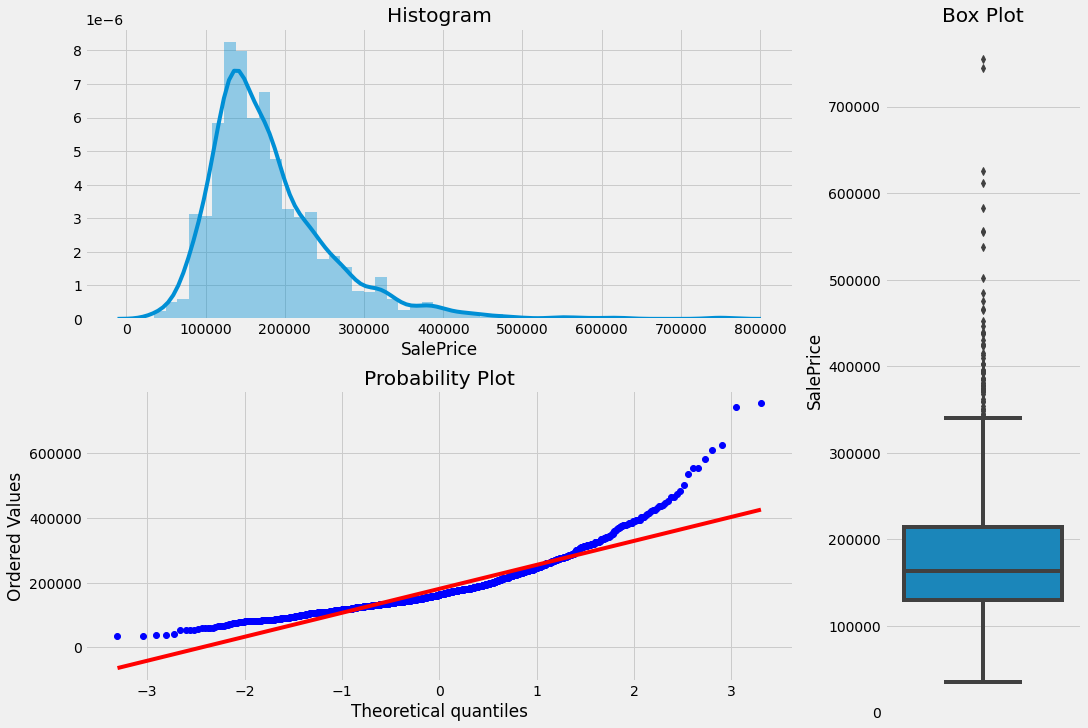

In [25]:
plotting_3_chart(train, 'SalePrice')

Now, let's make sure that the target variable follows a normal distribution. If you want to learn more about probability plot(Q-Q plot), try [this](https://www.youtube.com/watch?v=smJBsZ4YQZw) video..

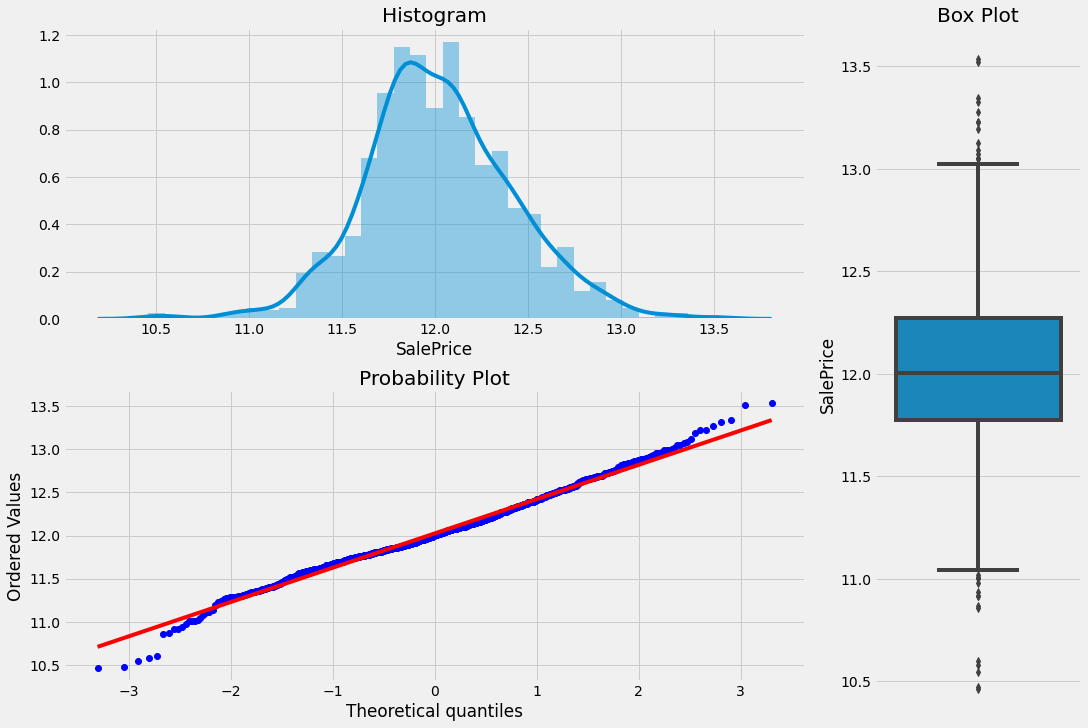

In [26]:
## trainsforming target variable using numpy.log1p, 
train["SalePrice"] = np.log1p(train["SalePrice"])

## Plotting the newly transformed response variable
plotting_3_chart(train, 'SalePrice')

As you can see the log transformation removes the normality of errors. This solves some of the other assumptions that we talked about above like Homoscedasticity. Let's make a comparison of the pre-transformed and post-transformed state of residual plots. 

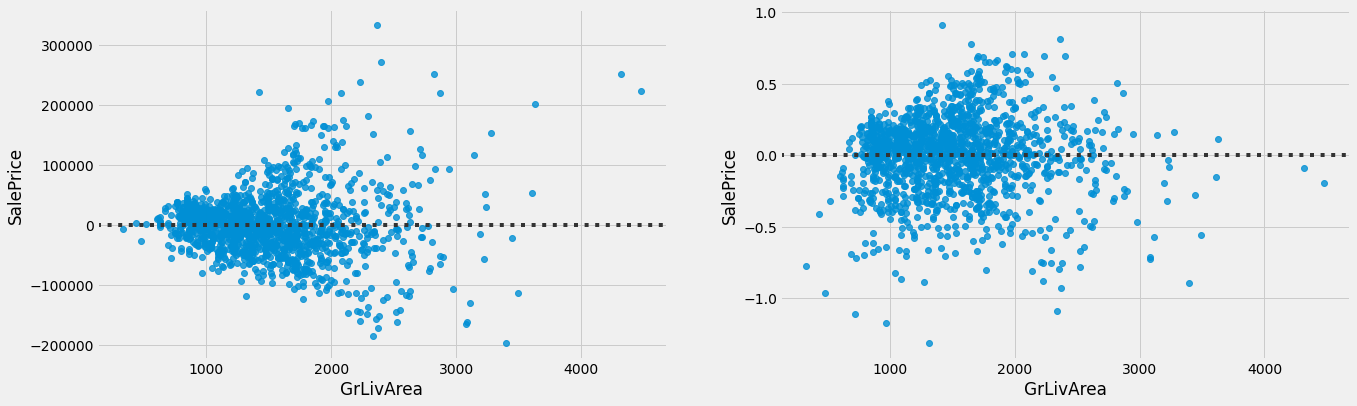

In [27]:
## Customizing grid for two plots. 
fig, (ax1, ax2) = plt.subplots(figsize = (20,6), ncols=2, sharey = False, sharex=False)
## doing the first scatter plot. 
sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice. 
sns.residplot(x = train.GrLivArea, y = train.SalePrice, ax = ax2);

Here, we can see that the pre-transformed chart on the left has heteroscedasticity, and the post-transformed chart on the right has almost an equal amount of variance across the zero lines.

**No or Little multicollinearity:** 
Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:
* The effect of predictor variables estimated by our regression will depend on what other variables are included in our model. 
* Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects. 
* With very high multicollinearity, the inverse matrix, the computer calculates may not be accurate. 
* We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.

Heatmap is an excellent way to identify whether there is multicollinearity or not. The best way to solve multicollinearity is to use regularization methods like Ridge or Lasso.

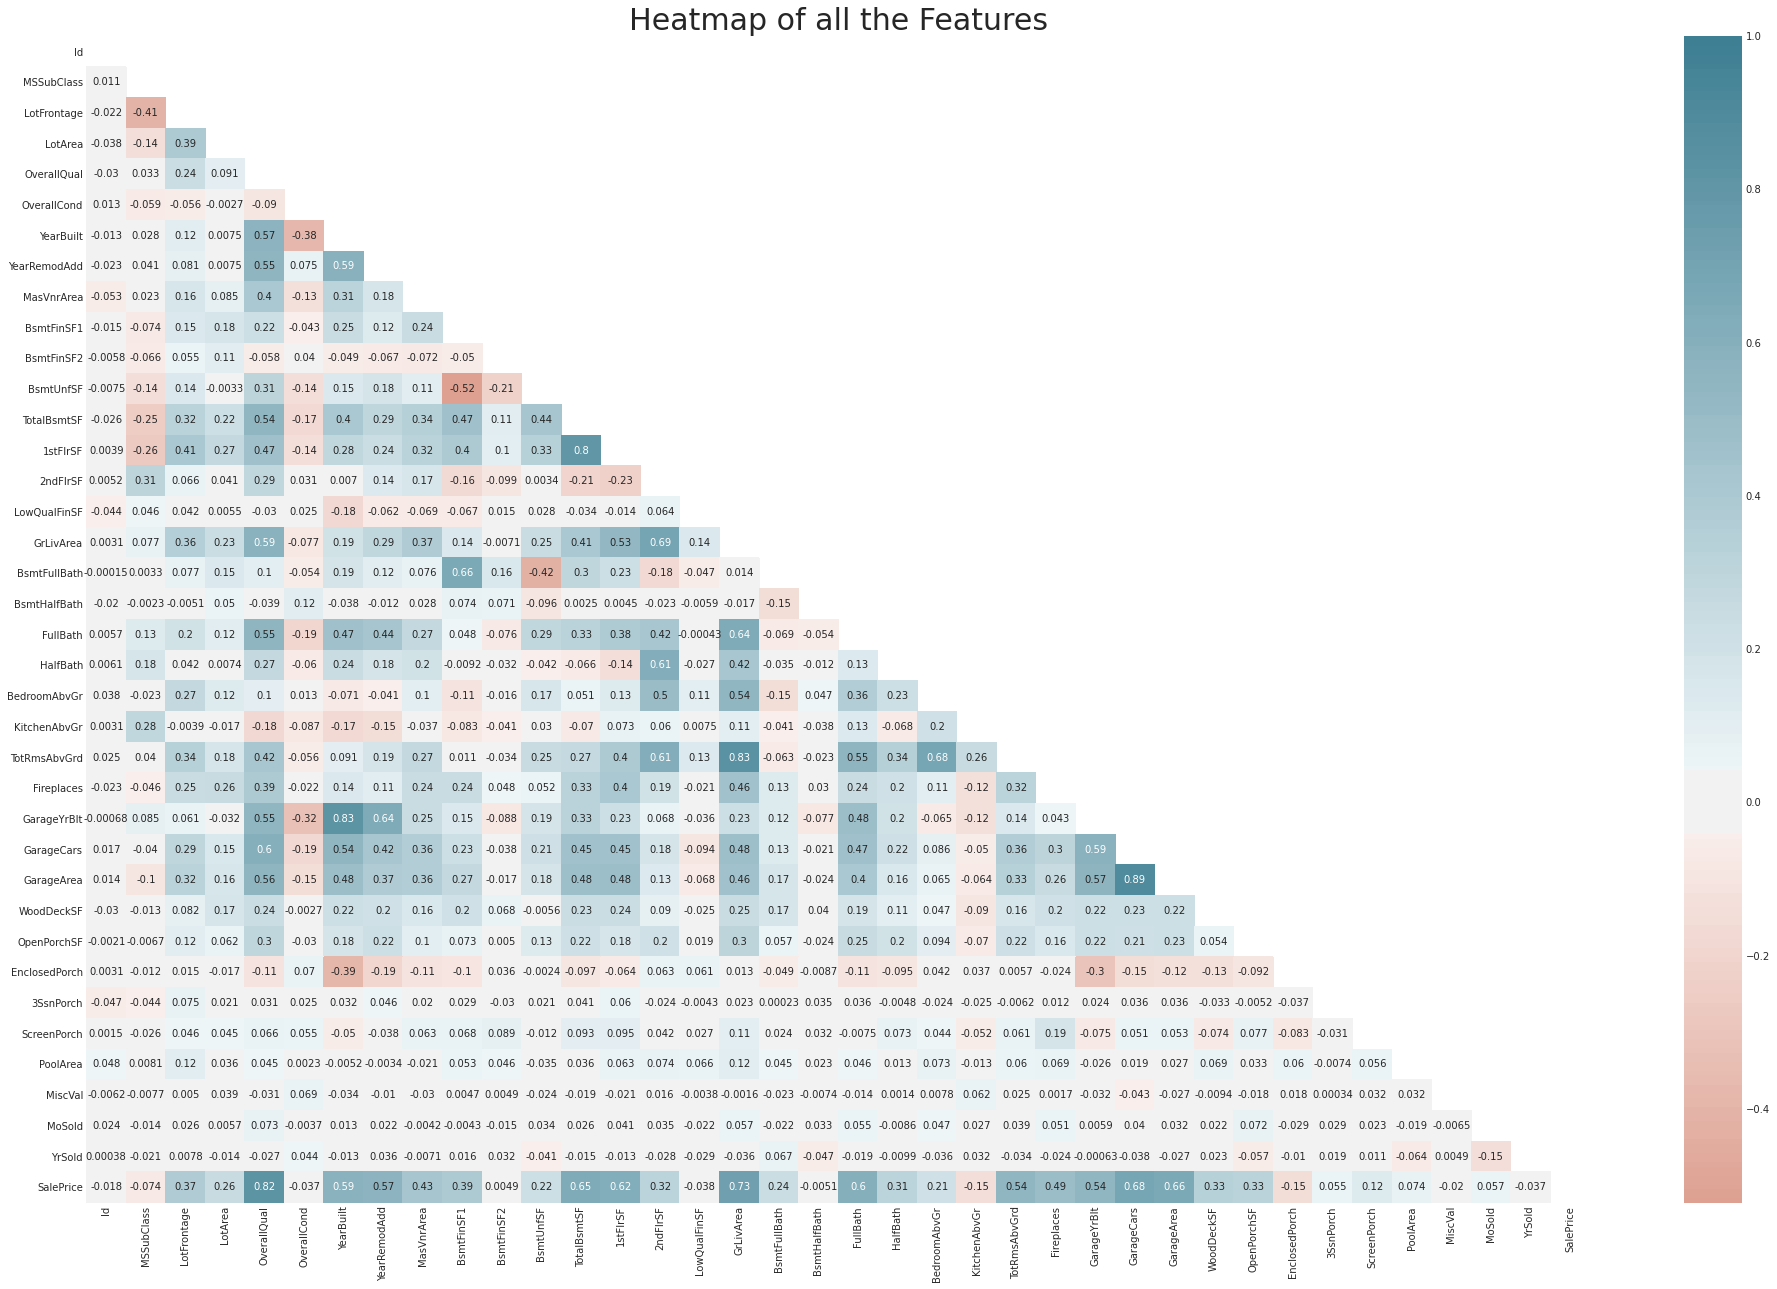

In [28]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

## Observation. 
As we can see, the multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and let models(Regularization models such as Lasso, Ridge) do the clean up later on. Let's go through some of the correlations that still exists. 

* There is 0.83 or 83% correlation between **GarageYrBlt** and **YearBuilt**. 
* 83% correlation between **TotRmsAbvGrd ** and **GrLivArea**. 
* 89% correlation between **GarageCars** and **GarageArea**. 
* Similarly many other features such as**BsmtUnfSF**, **FullBath** have good correlation with other independent feature but not so much with the dependent feature.

If we were using only multiple linear regression, deleting these features from the dataset would fit multiple linear regression algorithms better. However, we will be using many algorithms as scikit learn modules makes it easy to implement them and get the best possible model. Therefore, we will keep all the features for now. 


# Feature engineering

In [29]:
## Dropping the "Id" from train and test set. 
# train.drop(columns=['Id'],axis=1, inplace=True)

train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

## Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)



# getting a copy of train
previous_train = train.copy()

### Concatenation###
To keep consistency between test and train features we concatenate the two sets while remembering the index so we can split it later again.

In [30]:
## Combining train and test datasets together so that we can do all the work at once. 
features = pd.concat((train, test)).reset_index(drop = True)

## Dropping the target variable. 
features.drop(['SalePrice'], axis = 1, inplace = True)

In [31]:
features.shape

(2917, 79)

## Dealing with Missing Values
> **Missing data in train and test data(all_data)**

In [32]:
missing_percentage(features)

,Total,Percent
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageFinish,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageCond,159,5.45



## Imputing Missing Values (NA's)##
Let's figure out what NA's exist, sort them by categories and impute them in the best possible way.

In [33]:
nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

                 0        1
PoolQC        2908   object
MiscFeature   2812   object
Alley         2719   object
Fence         2346   object
FireplaceQu   1420   object
LotFrontage    486  float64
GarageCond     159   object
GarageQual     159   object
GarageYrBlt    159  float64
GarageFinish   159   object
GarageType     157   object
BsmtExposure    82   object
BsmtCond        82   object
BsmtQual        81   object
BsmtFinType2    80   object
BsmtFinType1    79   object
MasVnrType      24   object
MasVnrArea      23  float64
MSZoning         4   object
Utilities        2   object
Functional       2   object
BsmtHalfBath     2  float64
BsmtFullBath     2  float64
GarageCars       1  float64
Exterior2nd      1   object
Exterior1st      1   object
KitchenQual      1   object
Electrical       1   object
BsmtUnfSF        1  float64
BsmtFinSF2       1  float64
BsmtFinSF1       1  float64
SaleType         1   object
TotalBsmtSF      1  float64
GarageArea       1  float64
There are 34 columns

Most of these can be filled with 'None'. Some exceptions though:

* Functional: The documentation says that we should assume "Typ", so lets impute that.
* Electrical: The documentation doesn't give any information but obviously every house has this so let's impute the most common value: "SBrkr".
* KitchenQual: Similar to Electrical, most common value: "TA".
* Exterior 1 and Exterior 2: Let's use the most common one here.
* SaleType: Similar to electrical, let's use most common value.

In [34]:
features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")

features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

Let's check some points individually to figure out the best imputation strategy

In [35]:
pd.set_option('max_columns', None)
features[features['PoolArea'] > 0 & features['PoolQC'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
197,1360,1360,0,NaN,4,1Fam,TA,No,1036.0,184.0,GLQ,LwQ,1.0,1.0,TA,140.0,Y,Artery,Norm,SBrkr,552,Gd,Gd,Stucco,Stucco,GdPrv,Ex,1,PConc,2,Typ,795.0,2.0,TA,Unf,TA,Detchd,1918.0,3112,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,25419,Corner,174.0,Reg,392,75,RL,0.0,None,NaN,0,3,NAmes,16,4,8,Y,512,Ex,CompShg,Gable,Abnorml,WD,0,Pave,8,1360.0,AllPub,0,1918,1990,2006
809,1309,0,0,NaN,3,1Fam,TA,No,663.0,377.0,ALQ,LwQ,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,GdPrv,Fa,1,CBlock,1,Typ,484.0,2.0,TA,RFn,TA,Attchd,1974.0,1309,1,GasA,Fa,1Story,1,Gd,Lvl,Gtl,10140,Inside,78.0,Reg,0,20,RL,99.0,BrkFace,NaN,0,1,NWAmes,0,6,6,Y,648,Fa,CompShg,Hip,Normal,WD,0,Pave,5,1040.0,AllPub,265,1974,1999,2006
1169,1118,0,0,NaN,3,1Fam,TA,Av,522.0,0.0,ALQ,Unf,1.0,0.0,TA,574.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,GdPrv,Po,1,CBlock,1,Typ,358.0,1.0,TA,Fin,TA,Attchd,1977.0,1118,0,GasA,TA,SLvl,1,TA,Lvl,Gtl,9880,Inside,76.0,Reg,0,80,RL,0.0,None,NaN,0,7,Mitchel,0,6,6,Y,576,Gd,CompShg,Gable,Normal,WD,0,Pave,6,1096.0,AllPub,203,1977,1977,2008
1181,2411,2065,0,NaN,4,1Fam,TA,Av,2096.0,0.0,GLQ,Unf,1.0,0.0,Ex,300.0,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,ImStucc,MnPrv,TA,2,PConc,3,Typ,813.0,3.0,TA,Fin,TA,Attchd,1996.0,4476,1,GasA,Ex,2Story,1,Ex,Lvl,Gtl,15623,Corner,160.0,IR1,0,60,RL,0.0,None,NaN,0,7,NoRidge,78,5,10,Y,555,Ex,CompShg,Hip,Abnorml,WD,0,Pave,10,2396.0,AllPub,171,1996,1996,2007
1384,1392,1392,0,NaN,5,1Fam,TA,No,790.0,469.0,BLQ,LwQ,1.0,0.0,Gd,133.0,Y,RRAn,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,TA,2,CBlock,3,Typ,564.0,2.0,TA,RFn,TA,Attchd,1978.0,2784,1,GasA,TA,2Story,1,Gd,Lvl,Gtl,16692,Inside,80.0,IR1,0,60,RL,184.0,BrkFace,TenC,2000,7,NWAmes,112,5,7,Y,519,Fa,CompShg,Gable,Normal,WD,440,Pave,12,1392.0,AllPub,0,1978,1978,2006
1421,1575,626,0,NaN,4,1Fam,TA,Av,0.0,0.0,Unf,Unf,0.0,0.0,Gd,697.0,Y,Norm,Norm,SBrkr,0,Gd,Gd,Plywood,Plywood,GdPrv,Gd,1,CBlock,2,Typ,432.0,2.0,Gd,Unf,Gd,Attchd,1966.0,2201,0,GasA,TA,SLvl,1,Gd,Lvl,Gtl,19690,CulDSac,NaN,IR1,0,80,RL,0.0,None,NaN,0,8,Edwards,236,7,6,Y,738,Gd,Tar&Grv,Flat,Alloca,WD,0,Pave,8,697.0,AllPub,586,1966,1966,2006
1972,2470,0,0,NaN,1,1Fam,TA,Gd,2257.0,0.0,GLQ,Unf,2.0,0.0,Ex,278.0,Y,Norm,Norm,SBrkr,0,TA,Ex,MetalSd,MetalSd,NaN,Gd,2,PConc,1,Typ,789.0,3.0,TA,Fin,TA,Attchd,2003.0,2470,1,GasA,Ex,1Story,1,Ex,HLS,Mod,12720,Inside,106.0,Reg,0,20,RL,680.0,Stone,NaN,0,2,NridgHt,65,5,10,Y,144,Ex,CompShg,Hip,Normal,WD,216,Pave,7,2535.0,AllPub,154,2003,2003,2008
2418,1647,0,0,NaN,3,1Fam,TA,No,595.0,354.0,BLQ,Rec,1.0,0.0,TA,156.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,GdPrv,Fa,1,CBlock,1,Min1,280.0,1.0,TA,Fin,TA,Attchd,1953.0,1647,0,GasA,Gd,1Story,1,TA,Lvl,Gtl,9532,Inside,75.0,Reg,0,20,RL,0.0,None,NaN,0,2,NAmes,0,6,4,Y,368,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1105.0,AllPub,225,1953,1953,2007
2501,1105,717,0,NaN,4,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1105.0,Y,Feedr,Norm,SBrkr,1012,TA,TA,Wd Sdng,Wd Sdng,NaN,Po,1,CBlock,2,Min2,515.0,2.0,TA,Unf,TA,Attchd,1984.0,1822,0,GasA,Ex,1.5Fin,1,Gd,Lvl,Gtl,23920,Inside,104.0,Reg,0,50,RL,0.0,None,NaN,0,4,SawyerW,195,5,6,P,444,NaN,CompShg,Gable,Normal,WD,0,Pave,7,1105.0,AllPub,0,1984,1984,2007
2571,2726,0,0,NaN,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,279.0,Y,Norm,Norm,SBrkr,169,TA,

There are three NaN's foor PoolQC that have a PoolArea. Let's impute them based on overall quality of the house.

In [36]:
features.loc[2418, 'PoolQC'] = 'Fa'
features.loc[2501, 'PoolQC'] = 'Gd'
features.loc[2597, 'PoolQC'] = 'Fa'

In [37]:
pd.set_option('max_columns', None)
features[(features['GarageType'] == 'Detchd') & features['GarageYrBlt'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2124,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.0,0.0,Rec,Unf,0.0,0.0,TA,1046.0,Y,Norm,Norm,SBrkr,180,TA,TA,Wd Sdng,Wd Sdng,MnPrv,NaN,0,PConc,2,Typ,360.0,1.0,NaN,NaN,NaN,Detchd,NaN,1984,0,GasA,Gd,2.5Unf,1,TA,Lvl,Gtl,8094,Inside,57.0,Reg,0,60,RM,0.0,None,Shed,1000,9,OldTown,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,1242.0,AllPub,64,1910,1983,2008
2574,942,886,0,NaN,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NaN,0,BrkTil,2,Typ,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,1828,0,GasA,Ex,2Story,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,NaN,0,3,IDOTRR,0,6,5,Y,0,NaN,CompShg,Gable,Alloca,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


So there are houses with garages that are detached but that have NaN's for all other Garage variables. Let's impute these manually too.

In [38]:
features.loc[2124, 'GarageYrBlt'] = features['GarageYrBlt'].median()
features.loc[2574, 'GarageYrBlt'] = features['GarageYrBlt'].median()

features.loc[2124, 'GarageFinish'] = features['GarageFinish'].mode()[0]
features.loc[2574, 'GarageFinish'] = features['GarageFinish'].mode()[0]

features.loc[2574, 'GarageCars'] = features['GarageCars'].median()

features.loc[2124, 'GarageArea'] = features['GarageArea'].median()
features.loc[2574, 'GarageArea'] = features['GarageArea'].median()

features.loc[2124, 'GarageQual'] = features['GarageQual'].mode()[0]
features.loc[2574, 'GarageQual'] = features['GarageQual'].mode()[0]

features.loc[2124, 'GarageCond'] = features['GarageCond'].mode()[0]
features.loc[2574, 'GarageCond'] = features['GarageCond'].mode()[0]

Let's look at the basements:

* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* BsmtFinSF1
* BsmtFinSF2
* BsmtUnfSF
* TotalBsmtSF

In [39]:
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF']

tempdf = features[basement_columns]
tempdfnulls = tempdf[tempdf.isnull().any(axis=1)]

In [40]:
# select just the rows that have less then 5 NA's, meaning there is incongruency in the row.
tempdfnulls[(tempdfnulls.isnull()).sum(axis=1) < 5]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
332,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0
947,Gd,TA,NaN,Unf,Unf,0.0,0.0,936.0,936.0
1485,Gd,TA,NaN,Unf,Unf,0.0,0.0,1595.0,1595.0
2038,Gd,NaN,Mn,GLQ,Rec,1044.0,382.0,0.0,1426.0
2183,TA,NaN,No,BLQ,Unf,1033.0,0.0,94.0,1127.0
2215,NaN,Fa,No,Unf,Unf,0.0,0.0,173.0,173.0
2216,NaN,TA,No,Unf,Unf,0.0,0.0,356.0,356.0
2346,Gd,TA,NaN,Unf,Unf,0.0,0.0,725.0,725.0
2522,TA,NaN,Av,ALQ,Unf,755.0,0.0,240.0,995.0


Let's impute all incongruencies with the most likely value

In [41]:
features.loc[332, 'BsmtFinType2'] = 'ALQ' #since smaller than SF1
features.loc[947, 'BsmtExposure'] = 'No' 
features.loc[1485, 'BsmtExposure'] = 'No'
features.loc[2038, 'BsmtCond'] = 'TA'
features.loc[2183, 'BsmtCond'] = 'TA'
features.loc[2215, 'BsmtQual'] = 'Po' #small basement so let's do Poor.
features.loc[2216, 'BsmtQual'] = 'Fa' #similar but a bit bigger.
features.loc[2346, 'BsmtExposure'] = 'No' #unfinished bsmt so prob not.
features.loc[2522, 'BsmtCond'] = 'Gd' #cause ALQ for bsmtfintype1

## Zoning##

In [42]:
subclass_group = features.groupby('MSSubClass')
Zoning_modes = subclass_group['MSZoning'].apply(lambda x : x.mode()[0])
Zoning_modes

MSSubClass
20     RL
30     RM
40     RL
45     RM
50     RL
60     RL
70     RM
75     RM
80     RL
85     RL
90     RL
120    RL
150    RL
160    RM
180    RM
190    RL
Name: MSZoning, dtype: object

In [43]:
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

For the rest we will just use a loop to impute 'None' value.

In [44]:
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

features.update(features[objects].fillna('None'))

nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

                0        1
LotFrontage   486  float64
GarageYrBlt   157  float64
MasVnrArea     23  float64
BsmtFullBath    2  float64
BsmtHalfBath    2  float64
BsmtFinSF1      1  float64
BsmtFinSF2      1  float64
BsmtUnfSF       1  float64
TotalBsmtSF     1  float64
There are 9 columns with missing values


Now let's think about imputing the missing values in the numerical features. Most of the time we impute 0, but sometimes something else is needed.

* LotFrontage: This is linear feet of street connected to property. Let's impute with the median per neighborhood with the assumption that this is extremely linked to what kind of area you live in.

In [45]:
neighborhood_group = features.groupby('Neighborhood')
lot_medians = neighborhood_group['LotFrontage'].median()
lot_medians

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    64.5
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

As expected the lotfrontage averages differ a lot per neighborhood so let's impute with the median per neighborhood.

In [46]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Let's also take a closer look at GarageYrBlt

In [47]:
pd.set_option('max_columns', None)
features[(features['GarageYrBlt'].isnull()) & features['GarageArea'] > 0]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


GarageYrBlt does not have any incongruencies. Let's also examine MasVnrArea.

In [48]:
pd.set_option('max_columns', None)
features[(features['MasVnrArea'].isnull())]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
234,860,1100,0,None,4,1Fam,TA,No,625.0,0.0,GLQ,Unf,1.0,0.0,Gd,235.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,2,PConc,2,Typ,440.0,2.0,TA,Fin,TA,BuiltIn,2002.0,1960,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,7851,Inside,64.0,Reg,0,60,RL,NaN,None,None,0,5,Gilbert,48,5,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,860.0,AllPub,288,2002,2002,2010
528,2515,0,0,None,4,1Fam,TA,No,1219.0,0.0,Rec,Unf,1.0,0.0,TA,816.0,Y,Norm,Norm,SBrkr,200,TA,Gd,Wd Sdng,Stone,None,TA,2,PConc,3,Maj1,484.0,2.0,TA,RFn,TA,Attchd,1975.0,2515,0,GasA,TA,1Story,2,TA,Lvl,Gtl,32668,CulDSac,70.0,IR1,0,20,RL,NaN,None,None,0,3,Crawfor,0,3,6,Y,0,None,CompShg,Hip,Alloca,WD,0,Pave,9,2035.0,AllPub,0,1957,1975,2007
649,822,843,0,None,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,813.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,None,None,0,PConc,2,Typ,562.0,2.0,TA,RFn,TA,Attchd,2007.0,1665,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8125,Inside,65.0,Reg,0,60,FV,NaN,None,None,0,5,Somerst,0,6,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,7,813.0,AllPub,0,2007,2007,2008
935,1200,0,0,None,2,1Fam,TA,No,833.0,0.0,GLQ,Unf,1.0,0.0,Gd,343.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,555.0,2.0,TA,RFn,TA,Attchd,2003.0,1200,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,10083,Inside,67.0,Reg,0,20,RL,NaN,None,None,0,8,SawyerW,41,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,5,1176.0,AllPub,0,2003,2003,2009
972,1428,0,0,None,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1428.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,None,None,0,PConc,2,Typ,480.0,2.0,TA,Fin,TA,Attchd,2007.0,1428,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,11639,Corner,95.0,Reg,0,20,FV,NaN,None,None,0,12,Somerst,120,5,7,Y,0,None,CompShg,Gable,Partial,New,0,Pave,6,1428.0,AllPub,0,2007,2008,2008
976,1241,0,0,Pave,1,TwnhsE,TA,No,1106.0,0.0,GLQ,Unf,1.0,0.0,Gd,135.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,1,Typ,569.0,2.0,TA,Fin,TA,Attchd,2007.0,1241,1,GasA,Ex,1Story,1,Gd,Lvl,Gtl,4274,Inside,35.0,IR1,0,120,FV,NaN,None,None,0,11,Somerst,116,5,7,Y,0,None,CompShg,Gable,Partial,New,0,Pave,4,1241.0,AllPub,0,2006,2007,2007
1242,2076,0,0,None,2,1Fam,Gd,Gd,1386.0,0.0,GLQ,Unf,1.0,0.0,Ex,690.0,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,850.0,3.0,TA,Fin,TA,Attchd,2006.0,2076,1,GasA,Ex,1Story,1,Ex,Lvl,Gtl,13891,Inside,107.0,Reg,0,20,RL,NaN,None,None,0,9,NridgHt,229,5,10,Y,0,None,CompShg,Gable,Partial,New,0,Pave,7,2076.0,AllPub,216,2006,2006,2006
1277,1128,903,0,None,3,1Fam,TA,No,804.0,0.0,GLQ,Unf,1.0,0.0,Gd,324.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,577.0,2.0,TA,RFn,TA,Attchd,2002.0,2031,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,9473,Inside,75.0,Reg,0,60,RL,NaN,None,None,0,3,CollgCr,211,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,7,1128.0,AllPub,0,2002,2002,2008
1689,878,1126,0,None,4,1Fam,TA,No,651.0,0.0,GLQ,Unf,1.0,0.0,Ex,219.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,644.0,3.0,TA,Fin,TA,BuiltIn,2002.0,2004,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,12891,Corner,64.0,IR1,0,60,RL,NaN,None,None,0,7,Gilbert,48,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,870.0,AllPub,0,2002,2002,2009
1704,1436,0,0,None,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Ex,1436.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No

No incongruencies here either. The rest can be safely imputed with 0 since this means that the property is not present in the house.

In [49]:
#Filling in the rest of the NA's

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes: 
        numerics.append(i)
        
features.update(features[numerics].fillna(0))

nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

Empty DataFrame
Columns: [0, 1]
Index: []
There are 0 columns with missing values


### Incorrect values###
Some values can be obviously wrong and this might impact our model. We used min and max values to check odd values in the data.

In [50]:
features.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.00000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,1157.692492,335.861502,2.604045,2.860130,438.864930,49.599246,0.428865,0.061364,560.50360,23.114158,0.596160,1.567364,472.453205,1.766198,1871.627014,1498.251628,0.379842,1.044566,10139.439150,69.436064,4.697635,57.135756,100.931436,50.860816,6.213576,47.280082,5.564964,6.086390,2.088790,16.073363,6.448063,1048.967775,93.629414,1971.287967,1984.248200,2007.792938
std,385.264298,428.119663,25.196714,0.822967,444.180542,169.232130,0.523943,0.245687,439.69883,64.263424,0.644773,0.552465,214.574064,0.761412,447.158503,496.908626,0.502782,0.214532,7807.036512,21.208242,46.412570,42.532140,178.032499,567.595198,2.713070,67.118965,1.113414,1.406704,34.561371,56.202054,1.564281,429.472008,126.532643,30.286991,20.892257,1.315328
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.00000,0.000000,0.000000,1.000000,320.000000,1.000000,1957.000000,1126.000000,0.000000,1.000000,7476.000000,60.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,0.000000,5.000000,793.000000,0.000000,1953.000000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.00000,0.000000,1.000000,2.000000,480.000000,2.000000,1977.000000,1444.000000,0.000000,1.000000,9452.000000,70.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,0.000000,6.000000,988.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1384.000000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,804.00000,0.000000,1.000000,2.000000,576.000000,2.000000,2001.000000,1743.000000,1.000000,1.000000,11556.000000,80.000000,0.000000,70.000000,163.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,4010.000000,1526.000000,3.000000,2.000000,2336.00000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5095.000000,2.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,576.000000,15.000000,5095.000000,1424.000000,2010.000000,2010.000000,2010.000000


Looking at the min and max of each variable there are some errors in the data.

* GarageYrBlt - the max value is 2207, this is obviously wrong since the data is only until 2010.

The rest of the data looks fine. Let's inspect this row a bit more carefully and impute an approximate correct value.

In [51]:
features[features['GarageYrBlt'] == 2207]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2590,1564,0,0,None,2,1Fam,TA,Av,583.0,0.0,GLQ,Unf,0.0,0.0,Gd,963.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,502.0,2.0,TA,RFn,TA,Attchd,2207.0,1564,0,GasA,Ex,1Story,1,Ex,HLS,Gtl,8298,Inside,68.0,IR1,0,20,RL,0.0,None,None,0,9,Timber,0,5,8,Y,0,None,CompShg,Hip,Partial,New,0,Pave,6,1546.0,AllPub,132,2006,2007,2007


This particular datapoint has YearBuilt in 2006 and YearRemodAdd in 2007. 2207 most likely is a data input error that should have been 2007 when the remodel happened. Let's impute 2007.

In [52]:
features.loc[2590, 'GarageYrBlt'] = 2007

## Factorization##
There are features that are read in as numericals but are actually objects. Let's transform them.

In [53]:
#factors = ['MSSubClass', 'MoSold']
factors = ['MSSubClass']
 


for i in factors:
    features.update(features[i].astype('str'))

### Skew transformation features###
Let's check skew in our features and transform if necessary.

In [54]:
from scipy.stats import skew

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


Using the boxcox1p transformation here because we tried the log transform first but a lot of skew remained in the data. Also using boxcox1p over normal boxcox because boxcox can't handle zero values.

In [55]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features > 0.5]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    features[i]= boxcox1p(features[i], boxcox_normmax(features[i]+1))

        
skew_features2 = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2

,skew
PoolArea,15.595057
3SsnPorch,8.862045
LowQualFinSF,8.492615
MiscVal,5.237983
BsmtHalfBath,3.779434
KitchenAbvGr,3.778336
ScreenPorch,3.152631
BsmtFinSF2,2.578329
EnclosedPorch,2.149133
MasVnrArea,0.977618


### Incomplete cases###
Checking to see if levels of variables in train and test datasets match and if not or if the level distribution is very low whether it should be deleted

In [56]:
objects3 = []
for i in features.columns:
    if features[i].dtype == object:
        objects3.append(i)

In [57]:
print("Training Set incomplete cases")

sums_features = features[objects3].apply(lambda x: len(np.unique(x)))
sums_features.sort_values(ascending=False)

Training Set incomplete cases


Neighborhood     25
Exterior2nd      16
MSSubClass       16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
GarageType        7
Functional        7
BsmtFinType2      7
RoofMatl          7
BsmtFinType1      7
Foundation        6
FireplaceQu       6
GarageCond        6
Heating           6
GarageQual        6
BsmtQual          6
SaleCondition     6
RoofStyle         6
Fence             5
MiscFeature       5
Electrical        5
ExterCond         5
BldgType          5
HeatingQC         5
MSZoning          5
LotConfig         5
BsmtExposure      5
BsmtCond          5
MasVnrType        4
LandContour       4
LotShape          4
ExterQual         4
GarageFinish      4
PoolQC            4
KitchenQual       4
Utilities         3
LandSlope         3
PavedDrive        3
Alley             3
CentralAir        2
Street            2
dtype: int64

Let's take a closer look at some of these lower numbered variables.

In [58]:
print(features['Street'].value_counts())
print('-----')
print(features['Utilities'].value_counts())
print('-----')
print(features['CentralAir'].value_counts())
print('-----')
print(features['PavedDrive'].value_counts())

Pave    2905
Grvl      12
Name: Street, dtype: int64
-----
AllPub    2914
None         2
NoSeWa       1
Name: Utilities, dtype: int64
-----
Y    2721
N     196
Name: CentralAir, dtype: int64
-----
Y    2639
N     216
P      62
Name: PavedDrive, dtype: int64


We experimented a bunch with this and decided in the end that if a column has low amount of levels and most values are in the same class (>97%) let's remove them.

Let's delete Utilities because of how unbalanced it is.

In [59]:
#features = features.drop(['Utilities'], axis=1)
features = features.drop(['Utilities', 'Street'], axis=1)

## Creating features##
In this section I create some features that can be created from the current data.

Size of the house. There are a few variables dealing with square footage, I don't use TotalBsmtSF as a proxy for the basement because I believe unfinished square feet in the basement area won't have a big impact on price as it needs money to make it 'livable' square footage, so I just use BsmtSF1 and BsmtSF2.

* BsmtFinSF1
* BsmtFinSF2
* 1stFlrSF
* 2ndFlrSF

Another combined variable is the bathrooms in the house. I count fullbath for 1 and halfbath for 0.5.

* FullBath
* HalfBath
* BsmtFullBath
* BsmtHalfBath

Another combined variable is the total porch size.

* OpenPorchSF
* EnclosedPorch
* 3SsnPorch
* Screenporch
* WoodDeckSF

Next to that I make some simplified features.

* haspool
* has2ndfloor
* hasgarage
* hasbsmt
* hasfireplace

In [60]:
features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5*features['HalfBath']) + 
                               features['BsmtFullBath'] + (0.5*features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                             features['WoodDeckSF'])


#simplified features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## Creating Dummies and Encode categorical features##
Since sklearn lm.fit() does not accept strings we have to convert our objects to dummy variables. Also, Numerically encode categorical features because most models can only handle numerical features.

In [61]:
features.shape

(2917, 85)

In [62]:
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

(2917, 321)

## Recreate train and test sets
Now we resplit the model in test and train

In [63]:
y.shape

(1458,)

In [64]:
X = final_features.iloc[:len(y),:]
testing_features = final_features.iloc[len(X):,:]

print(X.shape)
print(testing_features.shape)

(1458, 321)
(1459, 321)


### Overfitting prevention###
#### Outliers####
Let's do a little bit more in-depth and rigorous analysis first on outliers. I'll employ Leave-One-Out methodology with OLS to find which points have a significant effect on our model fit.

In [65]:
import statsmodels.api as sm

ols = sm.OLS(endog = y, exog = X)

fit = ols.fit()
test2 = fit.outlier_test()['bonf(p)']

In [66]:
outliers = list(test2[test2<1e-3].index) 

outliers

[30, 88, 462, 631, 1322]

So we find that these are outliers. Let's delete these.

In [67]:
X = X.drop(X.index[outliers])

y = y.drop(y.index[outliers])

### Dummy levels###
To prevent overfitting I'll also remove columns that have more than 97% 1 or 0 after doing pd.get_dummies.

In [68]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 >99.94:
        overfit.append(i)

In [69]:
overfit = list(overfit)
overfit

['BsmtQual_Po', 'MSSubClass_150']

Let's drop these from 'X' and 'testing_features'. Let's also drop MSZoning_C (all). It has about 99.44% zeros but unlike others with that kind of percentage it's being included in my lasso/ridge/elasticnet models with quite strong coefficient sizes.

In [70]:
overfit.append('MSZoning_C (all)')

In [71]:
overfit

['BsmtQual_Po', 'MSSubClass_150', 'MSZoning_C (all)']

In [72]:
X.drop(overfit,axis=1,inplace=True)
testing_features.drop(overfit,axis=1,inplace=True)

In [73]:
print(X.shape)
print(testing_features.shape)

(1453, 318)
(1459, 318)


## Baseline model##
### Full Model w/ kfold cross validation###
Let's build a baseline linear regression model to benchmark our feature selected models and advanced models on.

We decided not to do a manual train/test split but instead rely completely on 10-fold cross-validation for every model including our benchmark.


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

#Build our model method
lm = LinearRegression()

#Build our cross validation method
kfolds = KFold(n_splits=10, shuffle=True, random_state=23)

#build our model scoring function
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)


#second scoring metric
def cv_rmsle(model):
    rmsle = np.sqrt(np.log(-cross_val_score(model, X, y,
                                           scoring = 'neg_mean_squared_error',
                                           cv=kfolds)))
    return(rmsle)

Let's fit our first model

In [75]:
benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X, y=y)
cv_rmse(benchmark_model).mean()

0.11604310894469258

### Visualizing baseline model###
Let's see how the residuals and predictions vs actual values are distributed. Here we should note this looks abit high. This gets reduced down with feature selection but the baseline model includes all which leads to a ton of multicollinearity causing high RMSE values.

### Feature Selection##
Before starting this section it should be noted that we'll try to be extra careful not to create contamination during feature selection. Meaning that we'll select features constrained per fold in cross-validation to ensure no data leakage happens.

### Filter methods###
#### Coefficient importance####

In [76]:
coeffs = pd.DataFrame(list(zip(X.columns, benchmark_model.steps[1][1].coef_)), columns=['Predictors', 'Coefficients'])

coeffs.sort_values(by='Coefficients', ascending=False)

,Predictors,Coefficients
1,2ndFlrSF,5.391858e+10
4,BsmtFinSF1,8.986306e+09
5,BsmtFinSF2,6.197932e+07
0,1stFlrSF,2.144279e+07
289,PoolQC_None,3.700711e+00
...,...,...
286,PoolQC_Ex,-1.084364e+00
288,PoolQC_Gd,-1.216644e+00
287,PoolQC_Fa,-1.396180e+00
38,haspool,-3.700238e+00


This way of model fitting above is probably the simplest way to construct a machine learning model. However, Let's dive deep into some more complex regression. 

### Regularization Models
What makes regression model more effective is its ability of *regularizing*. The term "regularizing" stands for models ability **to structurally prevent overfitting by imposing a penalty on the coefficients.** 


There are three types of regularizations. 
* **Ridge**
* **Lasso**
* **Elastic Net**

These regularization methods work by penalizing **the magnitude of the coefficients of features** and at the same time **minimizing the error between the predicted value and actual observed values**.  This minimization becomes a balance between the error (the difference between the predicted value and observed value) and the size of the coefficients. The only difference between Ridge and Lasso is **the way they penalize the coefficients.** Elastic Net is the combination of these two. **Elastic Net** adds both the sum of the squares errors and the absolute value of the squared error. To get more in-depth of it, let us review the least squared loss function. 

**Ordinary least squared** loss function minimizes the residual sum of the square(RSS) to fit the data:

### $$ \text{minimize:}\; RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 $$

Let's review this equation once again, Here: 
* $y_i$ is the observed value. 
* $\hat{y}_i$ is the predicted value. 
* The error = $y_i$ - $\hat{y}_i$
* The square of the error = $(y_i - \hat{y}_i)^2$
* The sum of the square of the error = $\sum_{i=1}^n (y_i - \hat{y}_i)^2$, that's the equation on the left. 
* The only difference between left sides equation vs. the right sides one above is the replacement of $\hat{y}_i$, it is replaced by $\left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)$, which simply follow's the slope equation, y = mx+b, where, 
* $\beta_0$ is the intercept. 
* **$\beta_j$ is the coefficient of the feature($x_j$).**

Let's describe the effect of regularization and then we will learn how we can use loss function in Ridge.
* One of the benefits of regularization is that it deals with **multicollinearity**(high correlation between predictor variables) well, especially Ridge method. Lasso deals with **multicollinearity** more brutally by penalizing related coefficients and force them to become zero, hence removing them. However, **Lasso** is well suited for redundant variables. 
 
***
<div>
    
   ### Ridge:
Ridge regression adds penalty equivalent to the square of the magnitude of the coefficients. This penalty is added to the least square loss function above and looks like this...

### $$ \text{minimize:}\; RSS+Ridge = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_2\sum_{j=1}^p \beta_j^2$$

Here, 
* $\lambda_2$ is constant; a regularization parameter. It is also known as $\alpha$. The higher the value of this constant the more the impact in the loss function. 
    * When $\lambda_2$ is 0, the loss funciton becomes same as simple linear regression. 
    * When $\lambda_2$ is $\infty$, the coefficients become 0
    * When $\lambda_2$ is between  0 and $\infty$(0<$\lambda_2$<$\infty$), The $\lambda_2$ parameter will decide the miagnitude given to the coefficients. The coefficients will be somewhere between 0 and ones for simple linear regression. 
* $\sum_{j=1}^p \beta_j^2$, is the squared sum of all coefficients. 

Now that we know every nitty-gritty details about this equation, let's use it for science, but before that a couple of things to remember. 
* It is essential to standardize the predictor variables before constructing the models. 
* It is important to check for multicollinearity,

### Ridge Regression (L2 penalty)###

In [77]:
from sklearn.linear_model import RidgeCV

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(X, y)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

In [78]:
r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)

,RMSE
0.0001,0.113943
0.0003,0.112867
0.0005,0.112278
0.0007,0.111890
0.0009,0.111619
0.0100,0.110398
0.0500,0.109388
0.1000,0.108505
0.3000,0.106651
1.0000,0.104760


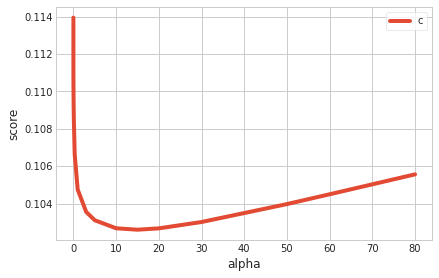

In [79]:
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

ridge_score_table = pd.DataFrame(ridge_scores, r_alphas, columns=['RMSE'])
ridge_score_table

In [80]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(X, y)

cv_rmse(ridge_model2).mean()

0.10263463640249568

In [81]:
ridge_model2.steps[1][1].alpha_

14.6

### Lasso:
Lasso adds penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the least square loss function and replaces the squared sum of coefficients from Ridge. 

## $$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

Here, 
* $\lambda_2$ is a constant similar to the Ridge function. 
* $\sum_{j=1}^p |\beta_j|$ is the absolute sum of the coefficients.

### Lasso Regression (L1 penalty)###

In [82]:
from sklearn.linear_model import LassoCV


alphas = [0.00005, 0.0001, 0.0003, 0.0005, 0.0007, 
          0.0009, 0.01]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas2,
                                    random_state = 42)).fit(X, y)

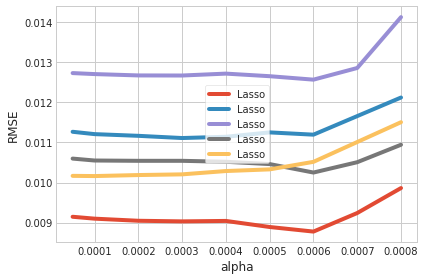

In [83]:
scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [84]:
lasso_model2.steps[1][1].alpha_

0.0002

In [85]:
cv_rmse(lasso_model2).mean()

0.10248700858476989

In [86]:
coeffs = pd.DataFrame(list(zip(X.columns, lasso_model2.steps[1][1].coef_)), columns=['Predictors', 'Coefficients'])

In [87]:
used_coeffs = coeffs[coeffs['Coefficients'] != 0].sort_values(by='Coefficients', ascending=False)
print(used_coeffs.shape)
print(used_coeffs)

(160, 2)
                Predictors  Coefficients
247            MSZoning_RL      0.193616
246            MSZoning_RH      0.187917
245            MSZoning_FV      0.186485
248            MSZoning_RM      0.156338
35       Total_sqr_footage      0.106694
..                     ...           ...
303  SaleCondition_Abnorml     -0.060452
87         Condition1_RRAe     -0.071071
17            KitchenAbvGr     -0.071079
194           Heating_Grav     -0.075947
162        Functional_Maj2     -0.088540

[160 rows x 2 columns]


In [88]:
used_coeffs_values = X[used_coeffs['Predictors']]
used_coeffs_values.shape

(1453, 160)

In [89]:
overfit_test2 = []
for i in used_coeffs_values.columns:
    counts2 = used_coeffs_values[i].value_counts()
    zeros2 = counts2.iloc[0]
    if zeros2 / len(used_coeffs_values) * 100 > 99.5:
        overfit_test2.append(i)
        
overfit_test2

['GarageQual_Ex',
 'RoofMatl_WdShngl',
 'PoolArea',
 'RoofStyle_Mansard',
 'Foundation_Wood',
 'GarageType_2Types',
 'Exterior1st_BrkComm',
 'Heating_Grav',
 'Functional_Maj2']

### Elastic Net: 
Elastic Net is the combination of both Ridge and Lasso. It adds both the sum of squared coefficients and the absolute sum of the coefficients with the ordinary least square function. Let's look at the function. 

### $$ \text{minimize:}\; RSS + Ridge + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2$$

This equation is pretty self-explanatory if you have been following this kernel so far.

### Elastic Net (L1 and L2 penalty)###
One of the issues with Lasso is that it's likely to pick, from correlated features, one at random. Elastic net would pick both. Its a bit of a mix between ridge and lasso. We decided to include it since R's implementation of ridge regression actually invovles some elasticNet properties.

In [90]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(X, y)

In [91]:
cv_rmse(elastic_model3).mean()

0.10267797881666554

In [92]:
print(elastic_model3.steps[1][1].l1_ratio_)
print(elastic_model3.steps[1][1].alpha_)

0.9
0.0002


## Xgboost##

In [93]:
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
%matplotlib inline
import xgboost as xgb
from xgboost import XGBRegressor

Belows function was used to obtain the optimal boosting rounds. This is accomplished useing xgb.cv's early stopping.

In [94]:
from sklearn.metrics import mean_squared_error

def modelfit(alg, dtrain, target, useTrainCV=True, 
             cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, 
                              label=y.values)
        
        print("\nGetting Cross-validation result..")
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,metrics='rmse', 
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval = True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    print("\nFitting algorithm to data...")
    alg.fit(dtrain, target, eval_metric='rmse')
        
    #Predict training set:
    print("\nPredicting from training data...")
    dtrain_predictions = alg.predict(dtrain)
        
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(target.values,
                                             dtrain_predictions)))

Gridsearching gave me optimal parameters for XGBoost

In [95]:
xgb3 = XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

xgb_fit = xgb3.fit(X, y)

[09:57:43] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


## LightGBM##

In [96]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [97]:
cv_rmse(lgbm_model).mean()

0.10828088900273773

In [98]:
lgbm_fit = lgbm_model.fit(X, y)

## Ensemble methods##
Let's see if we can get a better performance on the test data by employing ensemble methods. To stay in the constraints of the exercise, we combine these models.

* LassoCV
* RidgeCV
* Elasticnet
* Xgboost
* Lightgbm

Experimenting with averaging takes a lot of time. Basically we're optimizing the tradeoff between under and over fitting.

First we build a meta-regressor through a process called **stacking generalization** which trains a model on a part of the training set (it gets split first into a new training set and a holdout set). Then the algorithm tests these models on the holdout set and uses these predictions (called out-of-fold predictions) as input for the 'meta model'. Below is a grahpical representation of the process.

In [99]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "http://i.imgur.com/QBuDOjs.jpg")

### Ensemble 1 - Stacking Generalization###
To try to seek out more performance of our rank let's try Stacking Generalization, using the mlxtend package to implement it.

In [100]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

#setup models
ridge = make_pipeline(RobustScaler(), 
                      RidgeCV(alphas = alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas = alphas2,
                              random_state = 42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

lightgbm = make_pipeline(RobustScaler(),
                        LGBMRegressor(objective='regression',num_leaves=5,
                                      learning_rate=0.05, n_estimators=720,
                                      max_bin = 55, bagging_fraction = 0.8,
                                      bagging_freq = 5, feature_fraction = 0.2319,
                                      feature_fraction_seed=9, bagging_seed=9,
                                      min_data_in_leaf =6, 
                                      min_sum_hessian_in_leaf = 11))

xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.01, n_estimators=3460, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:linear',nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006))


#stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, 
                                            xgboost, lightgbm), 
                               meta_regressor=xgboost,
                               use_features_in_secondary=True)

#prepare dataframes
stackX = np.array(X)
stacky = np.array(y)

In [ ]:
#scoring 

print("cross validated scores")

for model, label in zip([ridge, lasso, elasticnet, xgboost, lightgbm, stack_gen],
                     ['RidgeCV', 'LassoCV', 'ElasticNetCV', 'xgboost', 'lightgbm',
                      'StackingCVRegressor']):
    
    SG_scores = cross_val_score(model, stackX, stacky, cv=kfolds,
                               scoring='neg_mean_squared_error')
    print("RMSE", np.sqrt(-SG_scores.mean()), "SD", scores.std(), label)

cross validated scores
RMSE 0.10337176445879036 SD 0.0012687305104336847 RidgeCV
RMSE 0.10330705164383513 SD 0.0012687305104336847 LassoCV
RMSE 0.10339762181698745 SD 0.0012687305104336847 ElasticNetCV
[10:00:41] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:55] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:01:08] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:01:22] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:01:38] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:01:51] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:02:05] WARNING: /workspace/src/o

In [ ]:
stack_gen_model = stack_gen.fit(stackX, stacky)

### Ensemble 2 - averaging###
Final averaging weights are mostly trial and error 

In [ ]:
em_preds = elastic_model3.predict(testing_features)
lasso_preds = lasso_model2.predict(testing_features)
ridge_preds = ridge_model2.predict(testing_features)
stack_gen_preds = stack_gen_model.predict(testing_features)
xgb_preds = xgb_fit.predict(testing_features)
lgbm_preds = lgbm_fit.predict(testing_features)

### Blend models in order to make the final predictions more robust to overfitting###

In [ ]:
stack_preds = ((0.2*em_preds) + (0.1*lasso_preds) + (0.1*ridge_preds) + 
               (0.2*xgb_preds) + (0.1*lgbm_preds) + (0.3*stack_gen_preds))

### Actual predictions for Kaggle###
Let's transform the predictions back to normal values because the model is trained with logSalePrice.

In [ ]:
submission = pd.read_csv("/kaggle/input/group-assignment-ace-2020/sample_submission.csv")
submission.iloc[:,1] = np.expm1(stack_preds)
submission.to_csv("final_submission.csv", index=False)